### Start by installing any packages that are not already in the library

In [ ]:
install.packages("broom.mixed")

### Next, load all of the necessary libraries

In [1]:
library(tidyverse)
library(tidymodels)  # for the parsnip package, along with the rest of tidymodels

# Helper packages
library(readr)       # for importing data
library(broom.mixed)
library(skimr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.3      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::

### Let's take a peek at the dataframe using skim from the skimr package

In [2]:
skimr::skim(iris)

── Data Summary ────────────────────────
                           Values
Name                       iris  
Number of rows             150   
Number of columns          5     
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 Species               0             1 FALSE          3
  top_counts               
1 set: 50, ver: 50, vir: 50

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd    p0   p25   p50   p75
1 Sepal.Length          0             1  5.84 0.828   4.3   5.1  5.8    6.4
2 Sepal.Width           0             1  3.06 0.436   2     2.8  3      3.3
3 Petal.Length          0             1  3.76 1.77    1  

In [3]:
urchins <-
  # Data were assembled for a tutorial 
  # at https://www.flutterbys.com.au/stats/tut/tut7.5a.html
  read_csv("https://tidymodels.org/start/models/urchins.csv") %>% 
  # Change the names to be a little more verbose
  setNames(c("food_regime", "initial_volume", "width")) %>% 
  # Factors are very helpful for modeling, so we convert one column
  mutate(food_regime = factor(food_regime, levels = c("Initial", "Low", "High")))
#> Parsed with column specification:
#> cols(
#>   TREAT = col_character(),
#>   IV = col_double(),
#>   SUTW = col_double()
#> )

Parsed with column specification:
cols(
  TREAT = col_character(),
  IV = col_double(),
  SUTW = col_double()
)



In [4]:
urchins
#> # A tibble: 72 x 3
#>    food_regime initial_volume width
#>    <fct>                <dbl> <dbl>
#>  1 Initial                3.5 0.01 
#>  2 Initial                5   0.02 
#>  3 Initial                8   0.061
#>  4 Initial               10   0.051
#>  5 Initial               13   0.041
#>  6 Initial               13   0.061
#>  7 Initial               15   0.041
#>  8 Initial               15   0.071
#>  9 Initial               16   0.092
#> 10 Initial               17   0.051
#> # … with 62 more rows

food_regime initial_volume width
1  Initial      3.5           0.010
2  Initial      5.0           0.020
3  Initial      8.0           0.061
4  Initial     10.0           0.051
5  Initial     13.0           0.041
6  Initial     13.0           0.061
7  Initial     15.0           0.041
8  Initial     15.0           0.071
9  Initial     16.0           0.092
10 Initial     17.0           0.051
11 Initial     19.0           0.051
12 Initial     20.0           0.082
13 Initial     21.0           0.102
14 Initial     21.0           0.092
15 Initial     24.0           0.051
16 Initial     24.0           0.061
17 Initial     24.0           0.082
18 Initial     28.0           0.071
19 Initial     29.0           0.071
20 Initial     35.0           0.082
21 Initial     36.0           0.061
22 Initial     39.0           0.082
23 Initial     39.0           0.112
24 Initial     44.0           0.102
25 Low          5.0           0.041
26 Low          8.0           0.031
27 Low          8.5           0.041
28 Low         11.5           0.082
29 Low         10.0           0.071
30 Low         14.0           0.051
⋮  ⋮           ⋮              ⋮    
43 Low         41.0           0.061
44 Low         43.0           0.061
45 Low         45.0           0.071
46 High         7.5           0.051
47 High         9.5           0.051
48 High         9.0           0.082
49 High         9.0           0.092
50 High        12.0           0.092
51 High        13.0           0.061
52 High        14.5           0.051
53 High        15.0           0.102
54 High        13.0           0.112
55 High        11.5           0.071
56 High        14.0           0.071
57 High        14.0           0.051
58 High        15.5           0.082
59 High        15.0           0.092
60 High        17.5           0.102
61 High        19.0           0.122
62 High        19.0           0.102
63 High        19.5           0.163
64 High        20.0           0.051
65 High        23.5           0.112
66 High        30.0           0.153
67 High        26.0           0.082
68 High        29.0           0.122
69 High        39.0           0.102
70 Low         47.5           0.041
71 Low         46.5           0.061
72 Low         11.5           0.031

`geom_smooth()` using formula 'y ~ x'



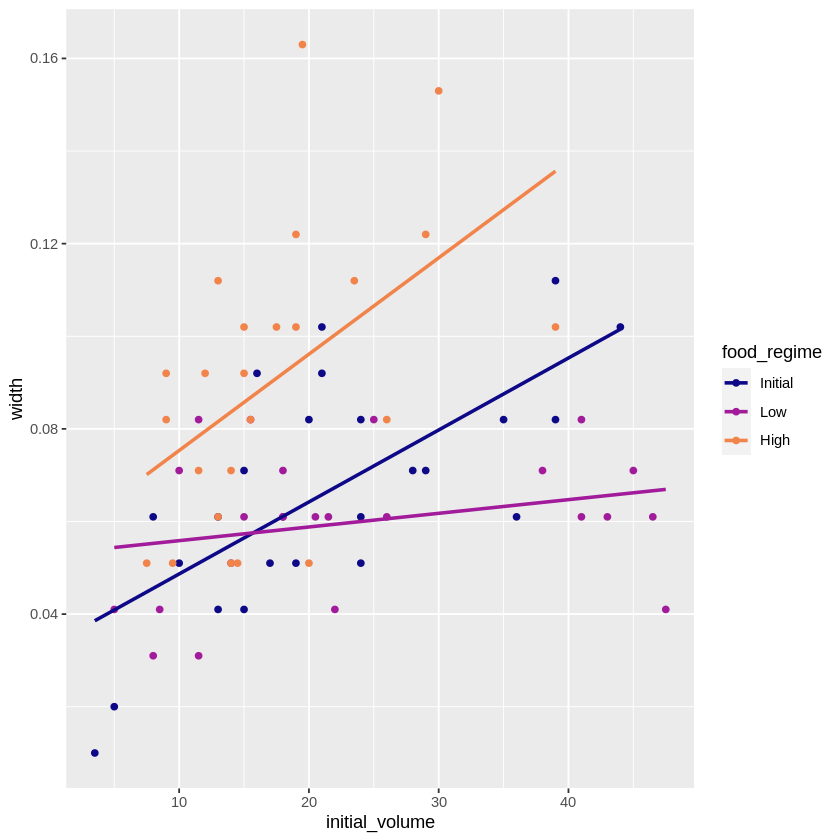

In [5]:
ggplot(urchins,
       aes(x = initial_volume, 
           y = width, 
           group = food_regime, 
           col = food_regime)) + 
  geom_point() + 
  geom_smooth(method = lm, se = FALSE) +
  scale_color_viridis_d(option = "plasma", end = .7)
#> `geom_smooth()` using formula 'y ~ x'

In [6]:
lm_mod <- 
  linear_reg() %>% 
  set_engine("lm")

In [7]:
lm_fit <- 
  lm_mod %>% 
  fit(width ~ initial_volume * food_regime, data = urchins)
lm_fit

parsnip model object

Fit time:  5ms 

Call:
stats::lm(formula = width ~ initial_volume * food_regime, data = data)

Coefficients:
                   (Intercept)                  initial_volume  
                     0.0331216                       0.0015546  
                food_regimeLow                 food_regimeHigh  
                     0.0197824                       0.0214111  
 initial_volume:food_regimeLow  initial_volume:food_regimeHigh  
                    -0.0012594                       0.0005254  


In [8]:
tidy(lm_fit)

term                           estimate      std.error    statistic 
1 (Intercept)                     0.0331216259 0.0096186287  3.4434873
2 initial_volume                  0.0015546403 0.0003978337  3.9077643
3 food_regimeLow                  0.0197823628 0.0129883393  1.5230864
4 food_regimeHigh                 0.0214111044 0.0145317736  1.4733993
5 initial_volume:food_regimeLow  -0.0012593696 0.0005101652 -2.4685525
6 initial_volume:food_regimeHigh  0.0005253946 0.0007019580  0.7484702
  p.value     
1 0.0010020308
2 0.0002220426
3 0.1325144691
4 0.1453969848
5 0.0161637663
6 0.4568356317

In [9]:
new_points <- expand.grid(initial_volume = 20, 
                          food_regime = c("Initial", "Low", "High"))
new_points

initial_volume food_regime
1 20             Initial    
2 20             Low        
3 20             High

In [10]:
mean_pred <- predict(lm_fit, new_data = new_points)
mean_pred

.pred     
1 0.06421443
2 0.05880940
3 0.09613343

.pred_lower .pred_upper
1 0.05549934  0.07292952 
2 0.04986251  0.06775629 
3 0.08696233  0.10530453

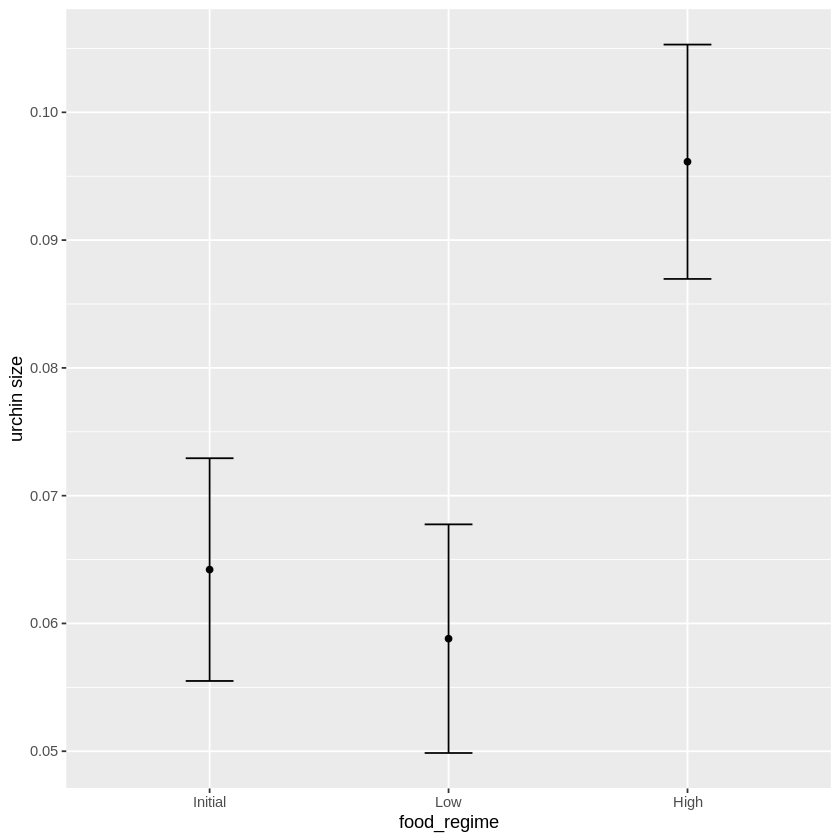

In [11]:
conf_int_pred <- predict(lm_fit, 
                         new_data = new_points, 
                         type = "conf_int")
conf_int_pred
#> # A tibble: 3 x 2
#>   .pred_lower .pred_upper
#>         <dbl>       <dbl>
#> 1      0.0555      0.0729
#> 2      0.0499      0.0678
#> 3      0.0870      0.105

# Now combine: 
plot_data <- 
  new_points %>% 
  bind_cols(mean_pred) %>% 
  bind_cols(conf_int_pred)

# and plot:
ggplot(plot_data, aes(x = food_regime)) + 
  geom_point(aes(y = .pred)) + 
  geom_errorbar(aes(ymin = .pred_lower, 
                    ymax = .pred_upper),
                width = .2) + 
  labs(y = "urchin size")

### Unrelated, but here's a pretty graph

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 15 rows containing missing values (geom_point).”


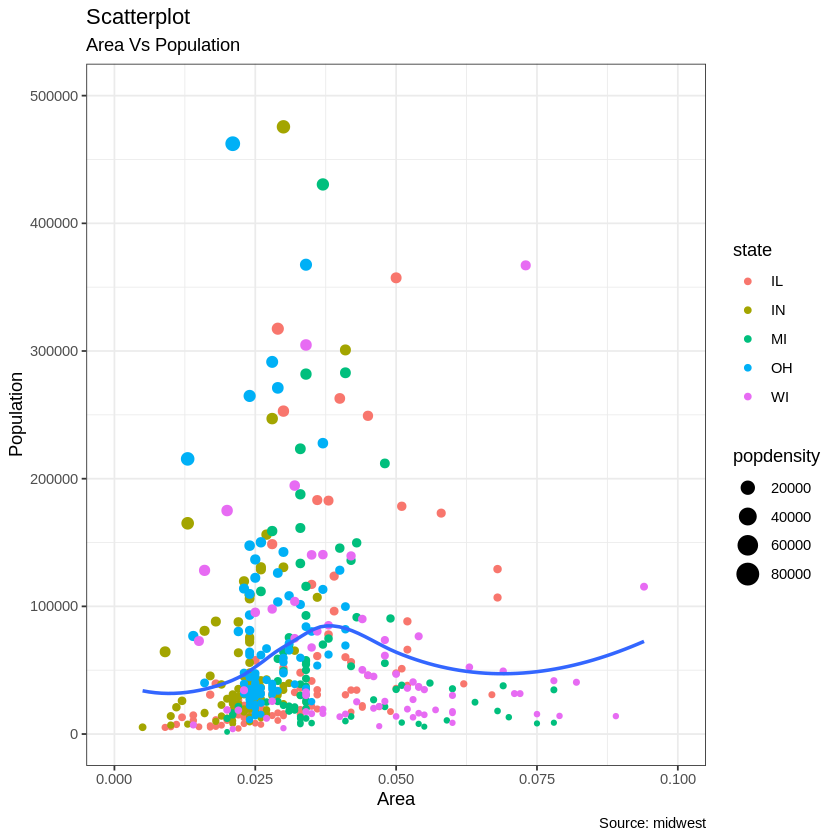

In [13]:
options(scipen=999)  # turn-off scientific notation like 1e+48
library(ggplot2)
theme_set(theme_bw())  # pre-set the bw theme.
data("midwest", package = "ggplot2")
# midwest <- read.csv("http://goo.gl/G1K41K")  # bkup data source

# Scatterplot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) + 
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot", 
       caption = "Source: midwest")

plot(gg)